<a href="https://colab.research.google.com/github/senarkitbank/datasets/blob/main/Ugam_Multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/train.csv')
df = pd.read_csv('https://raw.githubusercontent.com/senarkitbank/datasets/main/Data/train.csv')

In [3]:
print(df.columns)
df.head(2)

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')


,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1


**Number of Comments in Each Category ?**

In [4]:
df_tmp = df.drop(['Id','Review'], axis=1)
counts=[]
for i in list(df_tmp.columns.values):
    counts.append((i,df_tmp[i].sum()))

df_stats = pd.DataFrame(counts, columns=['Cateogry', 'Review_Count']).iloc[0:-1,:]
df_stats

#Also can try :
#df.iloc[:,3:-1].sum(axis=0)

,Cateogry,Review_Count
0,Components,274
1,Delivery and Customer Support,179
2,Design and Aesthetics,650
3,Dimensions,695
4,Features,313
5,Functionality,2538
6,Installation,762
7,Material,155
8,Price,854
9,Quality,2177


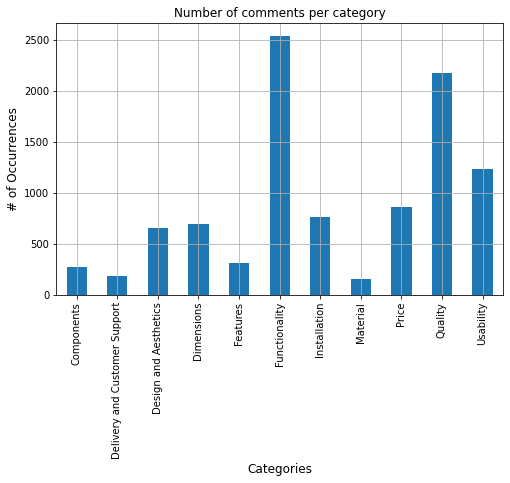

In [5]:
df_stats.plot(x='Cateogry', y='Review_Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.show()

**Number of Comments with Multi - Label ?**

In [6]:
#exclude polarity
rowsums = df.iloc[:,2:-1].sum(axis=1)
rowsums.value_counts()

1    3132
2    2352
3     618
4      34
dtype: int64